Visualize Data

In [16]:
from IPython.display import Audio
import librosa
import glob
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import svm
import warnings
warnings.filterwarnings("ignore")

In [17]:
from google.colab import drive

drive.mount('/content/mydrive')

Drive already mounted at /content/mydrive; to attempt to forcibly remount, call drive.mount("/content/mydrive", force_remount=True).


In [18]:
def get_Song(path):
  song_list = []
  song_path = path + "/*.mp3"
  for song in glob.glob(song_path):
      song_name = song.split("/")[-1].split(".")[0]
      song_path = song
      song_list.append([song_path,song_name])
  return song_list

In [19]:
train_path = "/content/mydrive/MyDrive/Colab Notebooks/Deep Learning/Homework_05/Mp3/Train_Song"
train_songs = get_Song(train_path)
train_songs

[['/content/mydrive/MyDrive/Colab Notebooks/Deep Learning/Homework_05/Mp3/Train_Song/Dancing With Your Ghost_Original.mp3',
  'Dancing With Your Ghost_Original'],
 ['/content/mydrive/MyDrive/Colab Notebooks/Deep Learning/Homework_05/Mp3/Train_Song/Dancing With Your Ghost_Cover_Man.mp3',
  'Dancing With Your Ghost_Cover_Man'],
 ['/content/mydrive/MyDrive/Colab Notebooks/Deep Learning/Homework_05/Mp3/Train_Song/Older_Original.mp3',
  'Older_Original'],
 ['/content/mydrive/MyDrive/Colab Notebooks/Deep Learning/Homework_05/Mp3/Train_Song/Older_Cover_Acoustic_Woman.mp3',
  'Older_Cover_Acoustic_Woman'],
 ['/content/mydrive/MyDrive/Colab Notebooks/Deep Learning/Homework_05/Mp3/Train_Song/เรื่องธรรมดา_cocktail.mp3',
  'เรื่องธรรมดา_cocktail'],
 ['/content/mydrive/MyDrive/Colab Notebooks/Deep Learning/Homework_05/Mp3/Train_Song/ดึงดัน_cocktail.mp3',
  'ดึงดัน_cocktail'],
 ['/content/mydrive/MyDrive/Colab Notebooks/Deep Learning/Homework_05/Mp3/Train_Song/คู่ชีวิต_cocktail.mp3',
  'คู่ชีวิต_coc

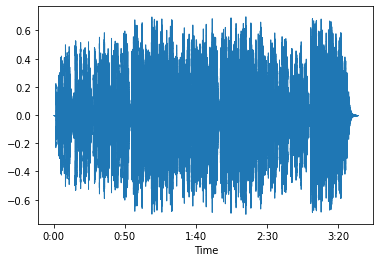

In [20]:
#print Amplitude
import librosa
import librosa.display

song, sr = librosa.load(train_songs[0][0])
librosa.display.waveshow(song)

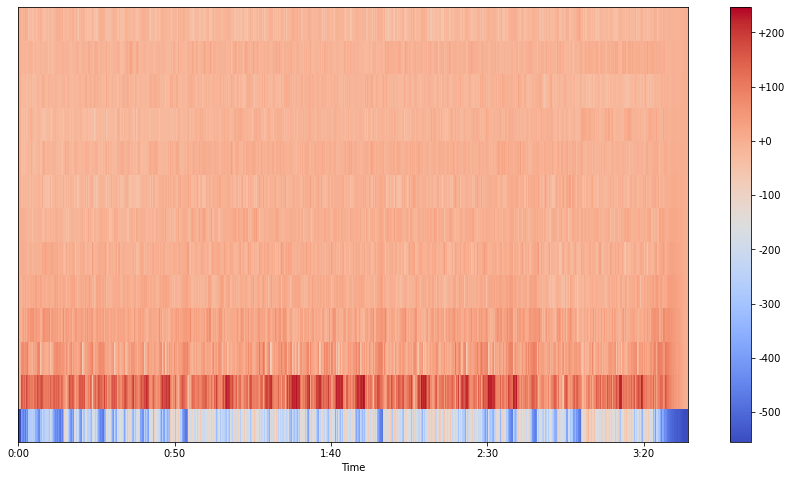

In [21]:
#print frequency Domain
mfcc_song = librosa.feature.mfcc(song, n_mfcc=13, sr=sr)
plt.figure(figsize=(15, 8))
librosa.display.specshow(mfcc_song, x_axis="time", sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

Prepare Data

In [22]:
# Sampling rate.
sr = 22050
# Let’s make sure all files have the same amount of samples, pick a duration right under 30 seconds.
TOTAL_SAMPLES = 29 * sr
# The dataset contains 999 files (1000–1 defective). Lets make it bigger.
# X amount of slices => X times more training examples.
NUM_SLICES = 10
SAMPLES_PER_SLICE = int(TOTAL_SAMPLES / NUM_SLICES)

def preprocess_data(source_path):

    # Let's create a dictionary of labels and processed data.
    mydict = {
        "labels": [],
        "mfcc": []
        }

    # Let's browse each file, slice it and generate the 13 band mfcc for each slice.
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(source_path)):

        for file in filenames:
            song, sr = librosa.load(os.path.join(dirpath, file), duration=29)

            for s in range(NUM_SLICES):
                start_sample = SAMPLES_PER_SLICE * s
                end_sample = start_sample + SAMPLES_PER_SLICE
                mfcc = librosa.feature.mfcc(y=song[start_sample:end_sample], sr=sr, n_mfcc=13)
                mfcc = mfcc.T
                # mydict["labels"].append(i-1)

                y = file.split('_')[0]
                if y == 'At My Worst ':
                  y = 'At My Worst'
                elif y == 'I':
                  y = 'Im yours '
                elif y == 'ช่างมัน ':
                  y = 'ช่างมัน'

                # mydict["labels"].append(file.split('_')[0])
                mydict["labels"].append(y)
                mydict["mfcc"].append(mfcc.tolist())

    X = np.array(mydict["mfcc"])
    y = np.array(mydict["labels"])
    return X,y

In [23]:
import os
X,y = preprocess_data("/content/mydrive/MyDrive/Colab Notebooks/Deep Learning/Homework_05/Mp3/Train_Song")

print(X.shape)
print(y.shape)

(260, 125, 13)
(260,)


In [24]:
l = list(set(y))
l

['Dancing With Your Ghost',
 'เรื่องธรรมดา',
 'คุกเข่า',
 'Im yours ',
 'ดึงดัน',
 'I Like You So Much',
 'ช่างมัน',
 'คู่ชีวิต',
 'เธอ',
 'โปรดเถิดรัก',
 'Older',
 'เรา',
 'At My Worst']

In [25]:
dict_music = {}
for index,i in enumerate(l):
  # print(index,i)
  dict_music[index] = i
dict_music

{0: 'Dancing With Your Ghost',
 1: 'เรื่องธรรมดา',
 2: 'คุกเข่า',
 3: 'Im yours ',
 4: 'ดึงดัน',
 5: 'I Like You So Much',
 6: 'ช่างมัน',
 7: 'คู่ชีวิต',
 8: 'เธอ',
 9: 'โปรดเถิดรัก',
 10: 'Older',
 11: 'เรา',
 12: 'At My Worst'}

In [26]:
#change y catagory to number 
def get_key(val):
    for key, value in dict_music.items():
         if val == value:
             return key
 
    return "There is no such Key"



#change y catagory to number 
y_num = []
for i in y:
  y_num.append(get_key(i))
y = np.array(y_num)
y

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  4,
        4,  4,  4,  4,  4

In [27]:
#split train, test, val
from sklearn.model_selection import train_test_split

def prepare_datasets(inputs, targets, split_size):
    
    # Creating a validation set and a test set.
    inputs_train, inputs_val, targets_train, targets_val = train_test_split(inputs, targets, test_size=split_size, random_state = 5 )
    inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs_train, targets_train, test_size=split_size, random_state = 5)
        
    return inputs_train, inputs_val, inputs_test, targets_train, targets_val, targets_test

Xtrain, Xval, Xtest, ytrain, yval, ytest = prepare_datasets(X, y, 0.2)

Xtrain.shape, Xval.shape, Xtest.shape, ytrain.shape, yval.shape, ytest.shape

((166, 125, 13), (52, 125, 13), (42, 125, 13), (166,), (52,), (42,))

LSTM

In [28]:
#make model
import tensorflow as tf

input_shape = (Xtrain.shape[1], Xtrain.shape[2])

model = tf.keras.models.Sequential([
        tf.keras.layers.LSTM(1000, input_shape= input_shape, return_sequences=True),
        tf.keras.layers.LSTM(1000),
        tf.keras.layers.Dense(1000, activation='relu'), 
        tf.keras.layers.Dense(500, activation='relu'), 
        tf.keras.layers.Dense(250, activation='relu'), 
        tf.keras.layers.Dense(64, activation='relu'), 
        tf.keras.layers.Dense(64, activation='relu'), 
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Dense(len(np.unique(y)), activation='softmax')
    ])

# Selection of the optimizer, loss type and metrics for performance evaluation.
model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics = ['acc']
                  )

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 125, 1000)         4056000   
                                                                 
 lstm_3 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense_6 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_7 (Dense)             (None, 500)               500500    
                                                                 
 dense_8 (Dense)             (None, 250)               125250    
                                                                 
 dense_9 (Dense)             (None, 64)                16064     
                                                                 
 dense_10 (Dense)            (None, 64)               

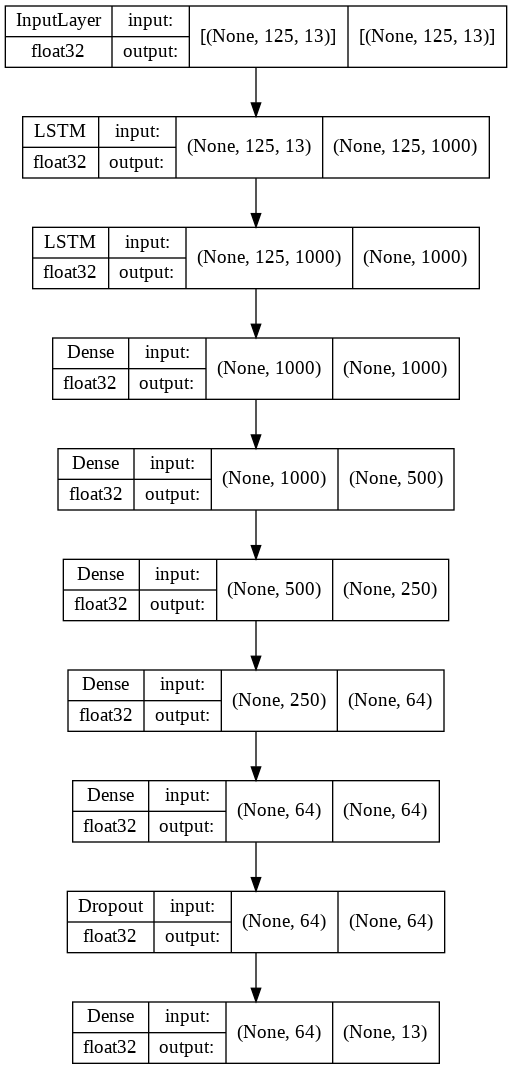

In [29]:
tf.keras.utils.plot_model(model, to_file = "LSTM.png", show_shapes = True, show_dtype = True, show_layer_names = False, dpi = 96)

In [31]:
#Training
checkpoint_filepath = "bestmodel_lstm.hdf5"
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_filepath, save_weight_only = False, monitor = "val_acc", mode="max", save_best_only = True,verbose=1)

history = model.fit(Xtrain, ytrain,
                    validation_data=(Xval, yval),
                    epochs=1000,
                    batch_size=32,
                    callbacks = [model_checkpoint_callback], verbose=2
                    )



Epoch 1/1000

Epoch 1: val_acc improved from -inf to 0.78846, saving model to bestmodel_lstm.hdf5
6/6 - 1s - loss: 0.0880 - acc: 0.9639 - val_loss: 1.3484 - val_acc: 0.7885 - 1s/epoch - 168ms/step
Epoch 2/1000

Epoch 2: val_acc improved from 0.78846 to 0.82692, saving model to bestmodel_lstm.hdf5
6/6 - 1s - loss: 0.0890 - acc: 0.9578 - val_loss: 1.3518 - val_acc: 0.8269 - 957ms/epoch - 159ms/step
Epoch 3/1000

Epoch 3: val_acc improved from 0.82692 to 0.84615, saving model to bestmodel_lstm.hdf5
6/6 - 1s - loss: 0.0912 - acc: 0.9578 - val_loss: 1.3168 - val_acc: 0.8462 - 958ms/epoch - 160ms/step
Epoch 4/1000

Epoch 4: val_acc did not improve from 0.84615
6/6 - 1s - loss: 0.0838 - acc: 0.9639 - val_loss: 1.3847 - val_acc: 0.8462 - 713ms/epoch - 119ms/step
Epoch 5/1000

Epoch 5: val_acc did not improve from 0.84615
6/6 - 1s - loss: 0.0834 - acc: 0.9578 - val_loss: 1.3859 - val_acc: 0.8462 - 718ms/epoch - 120ms/step
Epoch 6/1000

Epoch 6: val_acc did not improve from 0.84615
6/6 - 1s - lo

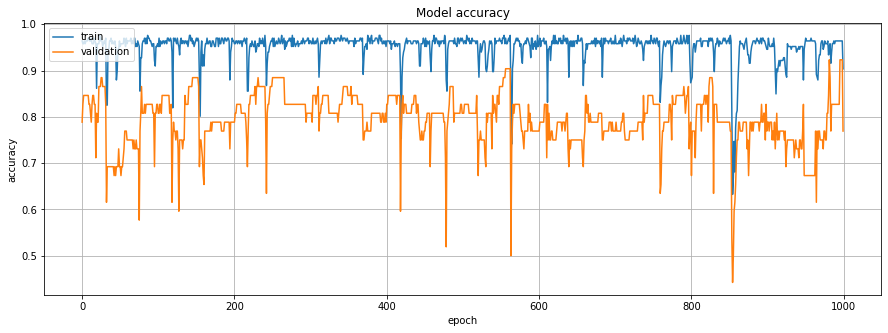

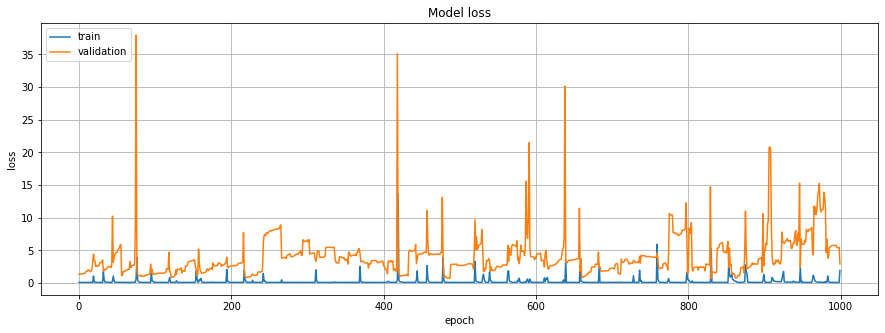

In [41]:
# Summarize history for accuracy
plt.figure(figsize=(15,5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.grid()
plt.show()

# Summarize history for loss
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.grid()
plt.show()

In [33]:
model.load_weights('bestmodel_lstm.hdf5')

In [34]:
#evaluate
results = model.evaluate(Xtest, ytest, batch_size = 32)
print(f"{model.metrics_names}: {results}")

2/2 [==============================] - 0s 34ms/step - loss: 21.7676 - acc: 0.7143
['loss', 'acc']: [21.767606735229492, 0.7142857313156128]
